# SECM Approach Curve Analysis with CNN
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd

***
## Building the Analytical Equations

<div>
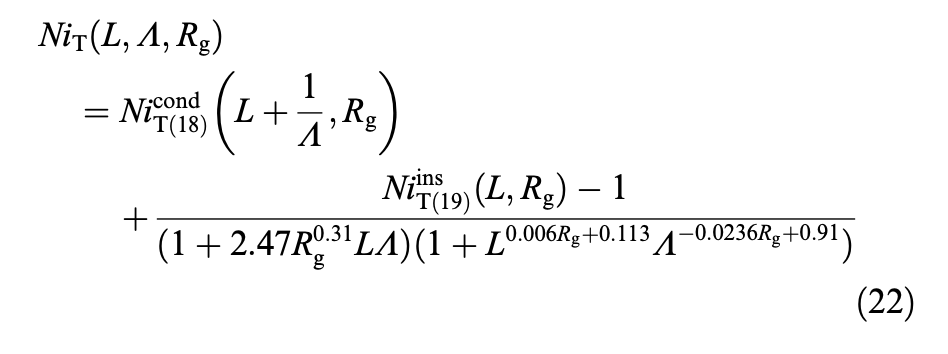
</div>

<div>
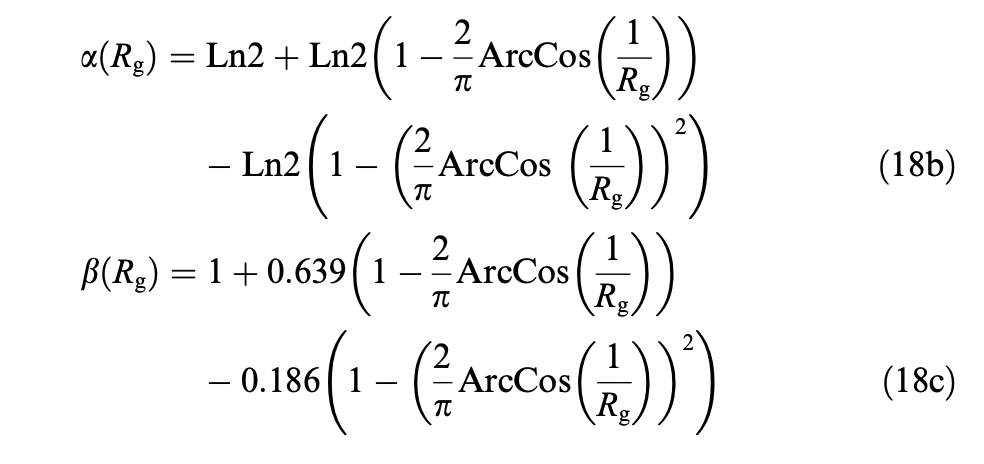
</div>

In [2]:
def get_i_pf(rg, L):
    alpha = log(2) + log(2)*(1-(2/pi)*acos(1/rg)) - log(2)*(1-((2/pi)*acos(1/rg))**2) #log natural log in math
    beta = 1 + 0.639*(1-(2/pi)*acos(1/rg)) - 0.186*(1-((2/pi)*acos(1/rg))**2)
    i_pf = alpha + pi/(4*beta*np.arctan(L)) + (1-alpha-(1/(2*beta)))*(2/pi)*np.arctan(L)
    return i_pf

In [3]:
def get_i_nf(rg, L):
    alpha = log(2) + log(2)*(1-(2/pi)*acos(1/rg)) - log(2)*(1-((2/pi)*acos(1/rg))**2) #log natural log in math
    beta = 1 + 0.639*(1-(2/pi)*acos(1/rg)) - 0.186*(1-((2/pi)*acos(1/rg))**2)
    i_nf_num = (2.08/rg**0.358)*(L-(0.145/rg)) + 1.585
    i_nf_dem = (2.08/rg**0.358)*(L+0.0023*rg) + 1.57 + log(rg)/L + (2/(pi*rg))*np.log(1+(pi*rg)/(2*L))
    i_nf = i_nf_num/i_nf_dem
    return i_nf

In [4]:
def gen_app_curve(rg, l_stop, Lambda):
    L = np.arange(5+l_stop, l_stop, -0.01)
    
    i_pf = get_i_pf(rg, L+1/Lambda)
    i_nf = get_i_nf(rg, L)
    
    i_mf = i_pf + (i_nf - 1)/((1+2.47*rg**0.31*L*Lambda)*(1+L**(0.006*rg+0.113)*Lambda**(-0.0236*rg+0.91)))
    
    return L, i_mf

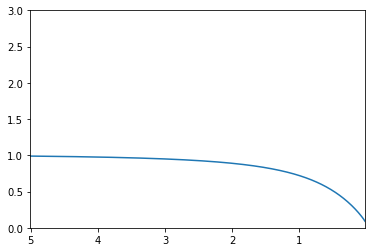

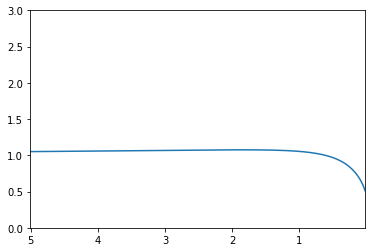

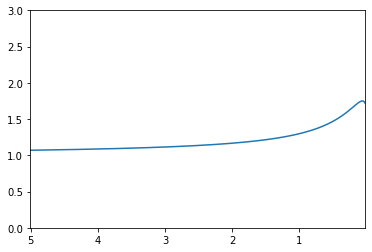

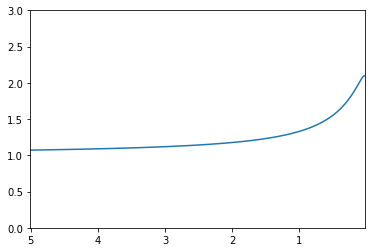

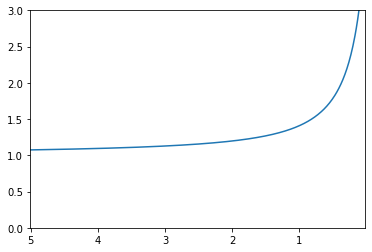

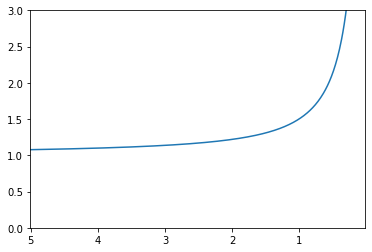

In [5]:
k_list = [0.001, 0.01, 0.04, 0.05, 0.1, 1]
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
for k in k_list:
    Lambda = k*a/D
    x,y = gen_app_curve(rg, 0.01, Lambda)
    plt.ylim(0,3)
    plt.xlim(max(x), min(x))
    plt.plot(x,y)
    plt.show()

## Non-linear Curve Fitting on Experimental Data

### Curve 0

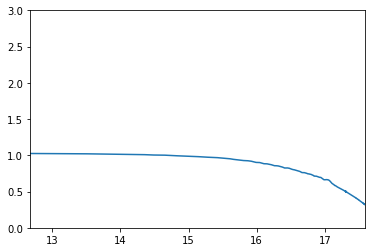

In [6]:
df_0 = pd.read_csv('Exp_0.csv')
plt.ylim(0,3)
plt.xlim(min(df_0['d_0']),max(df_0['d_0']))
plt.plot(df_0['d_0'],df_0['i_0'])

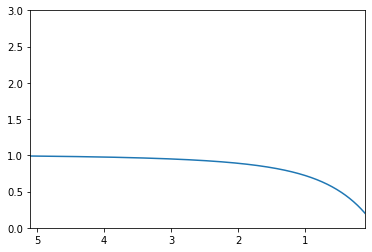

In [78]:
k = 0.001
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.1, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

### Curve 1

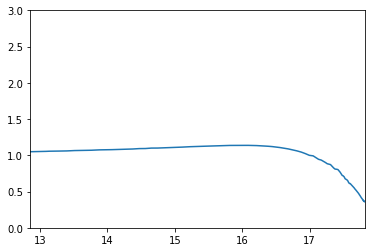

In [8]:
df_1 = pd.read_csv('Exp_1.csv')
plt.ylim(0,3)
plt.xlim(min(df_1['d_0']),max(df_1['d_0']))
plt.plot(df_1['d_0'],df_1['i_0'])

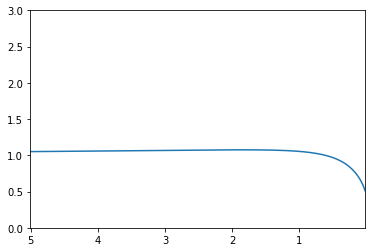

In [83]:
k = 0.01
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.01, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

## Curve 2

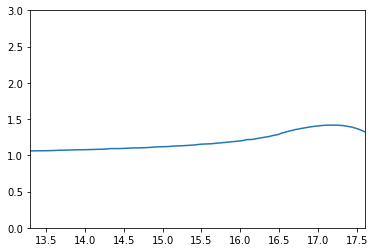

In [10]:
df_2 = pd.read_csv('Exp_2.csv')
plt.ylim(0,3)
plt.xlim(min(df_2['d_0']),max(df_2['d_0']))
plt.plot(df_2['d_0'],df_2['i_0'])

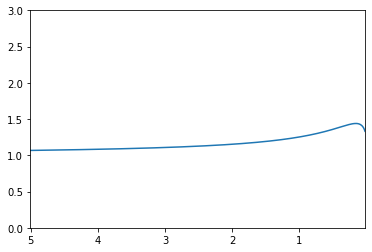

In [11]:
k = 0.03
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.01, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

### Curve 3

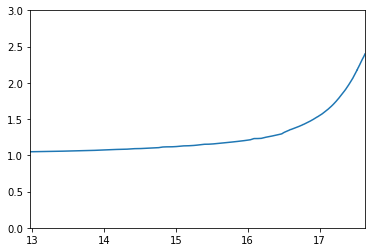

In [12]:
df_3 = pd.read_csv('Exp_3.csv')
plt.ylim(0,3)
plt.xlim(min(df_3['d_0']),max(df_3['d_0']))
plt.plot(df_3['d_0'],df_3['i_0'])

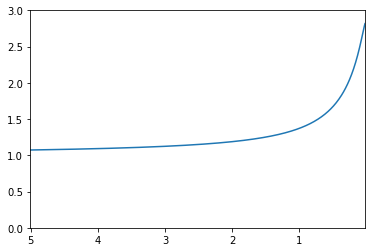

In [84]:
k = 0.07
D = 1*10**-5 #cm^2/s
a = 5 * 10**-4 #cm
rg = 4
Lambda = k*a/D
x,y = gen_app_curve(rg, 0.01, Lambda)
plt.ylim(0,3)
plt.xlim(max(x), min(x))
plt.plot(x,y)
plt.show()

## Generating Image Libary

In [14]:
def gen_rgb(k, l_stop):
    D = 1*10**-5 #cm^2/s
    a = 5 * 10**-4 #cm
    rg = 4
    Lambda = k*a/D
    x,y = gen_app_curve(rg, l_stop, Lambda)
    #x,y = gen_fun((0,6.2))
    
    my_dpi = 50
    fig = plt.figure(figsize=(100/my_dpi, 100/my_dpi), dpi=my_dpi)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(bottom=0, top=3)
    ax.set_xlim(left = max(x), right=min(x))
    ax.plot(x,y, color=[1,0,0])
    fig.tight_layout(pad=0)

    fig.canvas.draw()

    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return data[:,:,2]

In [15]:
bins = [(0.001,0.0029),
        (0.003, 0.0049),
        (0.005, 0.0069),
        (0.007, 0.0089),
        (0.009, 0.0099),
        (0.01, 0.029),
        (0.03, 0.049),
        (0.05, 0.069),
        (0.07, 0.089),
        (0.09, 0.1)]

In [16]:
l_stop_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3]

In [17]:
X = []
bin_num = 0
y = []
for k in bins:
    ks = np.linspace(k[0], k[1], 19)
    for k in ks:
        for l_stop in l_stop_list:
            X.append(gen_rgb(k,l_stop))
            y.append(bin_num)
    bin_num += 1

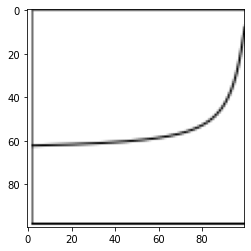

In [21]:
plt.imshow(X[3000], cmap='gray')

In [22]:
X = np.array(X)

In [23]:
X.shape

(3800, 100, 100)

In [24]:
X = X.reshape(-1,100,100,1)

In [25]:
X.shape

(3800, 100, 100, 1)

In [26]:
len(y)

3800

## Building the CNN

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53, stratify = y)

In [29]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)

In [30]:
y_train_one_hot[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [32]:
def create_model():
    
    model = Sequential()

    model.add(Input(shape=(100,100,1)))
    model.add(Conv2D(filters = 32, kernel_size = (10,10),padding = 'Same', activation ='relu'))
    model.add(Conv2D(filters = 32, kernel_size = (10,10),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [33]:
epochs = 10
batch_size = 32

In [34]:
model = create_model()
history = model.fit(X_train, y_train_one_hot, batch_size = batch_size, epochs = epochs, verbose = 2)

2022-04-14 14:09:13.033931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-14 14:09:13.034219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/kevin/miniforge3/envs/tf2/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-04-14 14:09:13.184974: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-14 14:09:13.185166: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
Epoch 1/10


2022-04-14 14:09:13.381526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


90/90 - 21s - loss: 5.3392 - accuracy: 0.3523
Epoch 2/10
90/90 - 20s - loss: 0.8096 - accuracy: 0.6818
Epoch 3/10
90/90 - 20s - loss: 0.6256 - accuracy: 0.7323
Epoch 4/10
90/90 - 20s - loss: 0.5483 - accuracy: 0.7533
Epoch 5/10
90/90 - 20s - loss: 0.5592 - accuracy: 0.7516
Epoch 6/10
90/90 - 20s - loss: 0.5005 - accuracy: 0.7737
Epoch 7/10
90/90 - 20s - loss: 0.4715 - accuracy: 0.7782
Epoch 8/10
90/90 - 20s - loss: 0.4602 - accuracy: 0.7796
Epoch 9/10
90/90 - 20s - loss: 0.4284 - accuracy: 0.7937
Epoch 10/10
90/90 - 20s - loss: 0.4324 - accuracy: 0.7947


In [35]:
y_pred = model.predict(X_test)

2022-04-14 14:12:40.674055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [36]:
y_pred_numbers = np.argmax(y_pred,axis = 1) 

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_numbers))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        95
           1       0.98      0.98      0.98        95
           2       0.98      0.96      0.97        95
           3       0.95      1.00      0.97        95
           4       0.95      0.99      0.97        95
           5       1.00      0.93      0.96        95
           6       0.66      0.97      0.79        95
           7       0.51      0.20      0.29        95
           8       0.42      0.78      0.54        95
           9       0.76      0.23      0.35        95

    accuracy                           0.80       950
   macro avg       0.82      0.80      0.78       950
weighted avg       0.82      0.80      0.78       950



In [38]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test,y_pred_numbers)

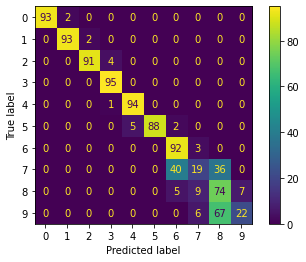

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot()
plt.show()

## Validation Data - Test on Experimental

In [66]:
def get_exp_images(df):
    x= -df['d_0']
    y = df['i_0']
    
    my_dpi = 50
    fig = plt.figure(figsize=(100/my_dpi, 100/my_dpi), dpi=my_dpi)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(bottom=0, top=3)
    ax.set_xlim(left = max(x), right=min(x))
    ax.plot(x,y, color=[1,0,0])
    fig.tight_layout(pad=0)

    fig.canvas.draw()

    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return data[:,:,2]

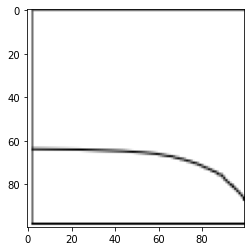

In [88]:
X_0 = get_exp_images(df_0)
y_0 = 0
plt.imshow(X_0, cmap = 'gray')

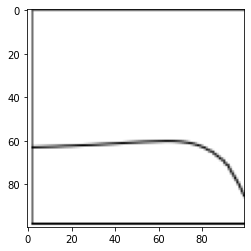

In [89]:
X_1 = get_exp_images(df_1)
y_1 = 5
plt.imshow(X_1, cmap = 'gray')

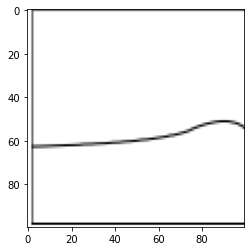

In [90]:
X_2 = get_exp_images(df_2)
y_2 = 6
plt.imshow(X_2, cmap = 'gray')

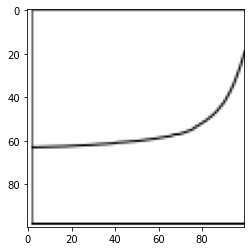

In [91]:
X_3 = get_exp_images(df_3)
y_3 = 8
plt.imshow(X_3, cmap = 'gray')

In [92]:
X_val = [X_0, X_1, X_2, X_3]
y_val = [y_0, y_1, y_2, y_3]

In [93]:
X_val= np.array(X_val)
X_val.shape

(4, 100, 100)

In [94]:
X_val = X_val.reshape(-1,100,100,1)
X_val.shape

(4, 100, 100, 1)

In [95]:
y_pred_exp = model.predict(X_val)

In [96]:
y_pred_exp_numbers = np.argmax(y_pred_exp,axis = 1) 

In [97]:
y_pred_exp_numbers

array([0, 5, 6, 8])

In [98]:
y_val

[0, 5, 6, 8]